In [30]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Get a list of all CSV files in the current directory
csv_files = glob.glob(os.path.join(os.getcwd(), "*.csv"))

# Create an empty list to store dataframes
dataframes = []

# Loop through the list of CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file, encoding='ISO-8859-1')
    dataframes.append(df)

# Display the columns of each dataframe
for i, df in enumerate(dataframes):
    print(f"Columns in file {csv_files[i]}: {df.columns.tolist()}")

Columns in file c:\Users\mayow\Desktop\Sirmayor\My Austria Files\School\STM\Semester  3 Winter\Test of Mechatronic System\Test of mechatronic systems\Test 1 Data vehicle parameters.csv: ['VEH_A0', 'VEH_B0', 'VEH_C0', 'VEH_MASS']
Columns in file c:\Users\mayow\Desktop\Sirmayor\My Austria Files\School\STM\Semester  3 Winter\Test of Mechatronic System\Test of mechatronic systems\Test 1 Data.csv: ['time', 'SPEED']
Columns in file c:\Users\mayow\Desktop\Sirmayor\My Austria Files\School\STM\Semester  3 Winter\Test of Mechatronic System\Test of mechatronic systems\Test 2 Data vehicle parameters.csv: ['VEH_A0', 'VEH_B0', 'VEH_C0', 'VEH_MASS']
Columns in file c:\Users\mayow\Desktop\Sirmayor\My Austria Files\School\STM\Semester  3 Winter\Test of Mechatronic System\Test of mechatronic systems\Test 2 Data.csv: ['time', 'SPEED']
Columns in file c:\Users\mayow\Desktop\Sirmayor\My Austria Files\School\STM\Semester  3 Winter\Test of Mechatronic System\Test of mechatronic systems\Test 3 Data vehicle pa

In [32]:
# Calculation of Fstreet for all the test data vehicles
for i in range(0, len(dataframes), 2):
    vehicle_params = dataframes[i]
    test_data = dataframes[i + 1]
    
    # Convert columns to numeric, forcing errors to NaN
    vehicle_params = vehicle_params.apply(pd.to_numeric, errors='coerce')
    test_data = test_data.apply(pd.to_numeric, errors='coerce')
    
    # Drop rows with NaN values
    vehicle_params = vehicle_params.dropna()
    test_data = test_data.dropna()
    
    # Calculate Fstreet
    VEH_A0 = vehicle_params['VEH_A0'].values[0]
    VEH_B0 = vehicle_params['VEH_B0'].values[0]
    VEH_C0 = vehicle_params['VEH_C0'].values[0]
    
    test_data['Fstreet'] = VEH_A0 + VEH_B0 * test_data['SPEED'] + VEH_C0 * (test_data['SPEED'] ** 2)
    
    # Print the first few rows of the result
    print(f"Fstreet for test data {i//2 + 1}:")
    print(test_data.head())


Fstreet for test data 1:
   time  SPEED  Fstreet
1   0.0   50.0    242.4
2   0.1   50.0    242.4
3   0.2   50.0    242.4
4   0.3   50.0    242.4
5   0.4   50.0    242.4
Fstreet for test data 2:
   time  SPEED  Fstreet
1   0.0    0.0    192.4
2   0.1    0.0    192.4
3   0.2    0.0    192.4
4   0.3    0.0    192.4
5   0.4    0.0    192.4
Fstreet for test data 3:
   time  SPEED  Fstreet
1   0.0    0.0    192.4
2   0.1    0.0    192.4
3   0.2    0.0    192.4
4   0.3    0.0    192.4
5   0.4    0.0    192.4
Fstreet for test data 4:
   time  SPEED     Fstreet
1   0.0   0.00  192.400000
2   0.1   0.15  192.325675
3   0.2   0.30  192.252700
4   0.3   0.45  192.181075
5   0.4   0.60  192.110800
Fstreet for test data 5:
   time     SPEED     Fstreet
1   0.0  0.000000  192.400000
2   0.1  0.000402  192.399799
3   0.2  0.001606  192.399197
4   0.3  0.003614  192.398193
5   0.4  0.006426  192.396788


In [33]:
# Loop through the test dataframes and calculate acceleration
for i in range(1, len(dataframes), 2):
    test_data = dataframes[i]
    
    # Convert columns to numeric, forcing errors to NaN
    test_data['time'] = pd.to_numeric(test_data['time'], errors='coerce')
    test_data['SPEED'] = pd.to_numeric(test_data['SPEED'], errors='coerce')
    
    # Drop rows with NaN values
    test_data = test_data.dropna()
    
    # Calculate acceleration
    test_data['acceleration'] = np.gradient(test_data['SPEED'], test_data['time'])
    
    # Print the first few rows of the result
    print(f"Acceleration for test data {i//2 + 1}:")
    print(test_data.head())

    # Store acceleration values for all test data
    all_accelerations = []

    for i in range(1, len(dataframes), 2):
        test_data = dataframes[i]
        
        # Convert columns to numeric, forcing errors to NaN
        test_data['time'] = pd.to_numeric(test_data['time'], errors='coerce')
        test_data['SPEED'] = pd.to_numeric(test_data['SPEED'], errors='coerce')
        
        # Drop rows with NaN values
        test_data = test_data.dropna()
        
        # Calculate acceleration
        test_data['acceleration'] = np.gradient(test_data['SPEED'], test_data['time'])
        
        # Append acceleration values to the list
        all_accelerations.append(test_data['acceleration'].values)

    # Print the acceleration values for all tests
    for idx, acc in enumerate(all_accelerations):
        print(f"Acceleration values for test data {idx + 1}:")
        print(acc)

Acceleration for test data 1:
   time  SPEED  acceleration
1   0.0   50.0           0.0
2   0.1   50.0           0.0
3   0.2   50.0           0.0
4   0.3   50.0           0.0
5   0.4   50.0           0.0


C:\Users\mayow\AppData\Local\Temp\ipykernel_4848\675588119.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['acceleration'] = np.gradient(test_data['SPEED'], test_data['time'])
C:\Users\mayow\AppData\Local\Temp\ipykernel_4848\675588119.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['acceleration'] = np.gradient(test_data['SPEED'], test_data['time'])
C:\Users\mayow\AppData\Local\Temp\ipykernel_4848\675588119.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy o

Acceleration values for test data 1:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.68434189e-14
 -5.68434189e-14  0.00000000e+00  5.68434189e-14  5.68434189e-14
 -5.68434189e-14  5.68434189e-14 -5.68434189e-14  0.00000000e+00
  5.68434189e-14 -5.68434189e-14  5.68434189e-14 -5.68434189e-14
  0.00000000e+00  0.00000000e+00 -2.84217094e-14  2.84217094e-14
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.84217094e-14
  2.84217094e-14  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.84217094e-14  2.84217094e-14  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.84217094e-14  2.84217094e-14  0.00000000e+00
 -2.84217094e-14  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

C:\Users\mayow\AppData\Local\Temp\ipykernel_4848\675588119.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['acceleration'] = np.gradient(test_data['SPEED'], test_data['time'])
C:\Users\mayow\AppData\Local\Temp\ipykernel_4848\675588119.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['acceleration'] = np.gradient(test_data['SPEED'], test_data['time'])
C:\Users\mayow\AppData\Local\Temp\ipykernel_4848\675588119.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [34]:
# Loop through the test dataframes and calculate F_Acceleration
for i in range(1, len(dataframes), 2):
    vehicle_params = dataframes[i - 1]
    test_data = dataframes[i]
    
    # Convert columns to numeric, forcing errors to NaN
    vehicle_params = vehicle_params.apply(pd.to_numeric, errors='coerce')
    
    # Ensure 'all_accelerations' is assigned to test_data
    accelerations = all_accelerations[i//2]
    if len(accelerations) == len(test_data):
        test_data['all_accelerations'] = accelerations
    else:
        test_data['all_accelerations'] = np.resize(accelerations, len(test_data))
    
    # Drop rows with NaN values
    vehicle_params = vehicle_params.dropna()
    test_data = test_data.dropna()
    
    # Get VEH_MASS
    VEH_MASS = vehicle_params['VEH_MASS'].values[0]
    
    # Calculate F_Acceleration
    test_data['F_Acceleration'] = VEH_MASS * test_data['all_accelerations']
    
    # Print the first few rows of the result
    print(f"F_Acceleration for test data {i//2 + 1}:")
    print(test_data.head())

F_Acceleration for test data 1:
   time  SPEED  all_accelerations  F_Acceleration
1   0.0   50.0                0.0             0.0
2   0.1   50.0                0.0             0.0
3   0.2   50.0                0.0             0.0
4   0.3   50.0                0.0             0.0
5   0.4   50.0                0.0             0.0
F_Acceleration for test data 2:
   time  SPEED  all_accelerations  F_Acceleration
1   0.0    0.0                0.0             0.0
2   0.1    0.0                0.0             0.0
3   0.2    0.0                0.0             0.0
4   0.3    0.0                0.0             0.0
5   0.4    0.0                0.0             0.0
F_Acceleration for test data 3:
   time  SPEED  all_accelerations  F_Acceleration
1   0.0    0.0                0.0             0.0
2   0.1    0.0                0.0             0.0
3   0.2    0.0                0.0             0.0
4   0.3    0.0                0.0             0.0
5   0.4    0.0                0.0             0.0
F_Ac

C:\Users\mayow\AppData\Local\Temp\ipykernel_4848\3013922115.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['F_Acceleration'] = VEH_MASS * test_data['all_accelerations']
C:\Users\mayow\AppData\Local\Temp\ipykernel_4848\3013922115.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['F_Acceleration'] = VEH_MASS * test_data['all_accelerations']
C:\Users\mayow\AppData\Local\Temp\ipykernel_4848\3013922115.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [35]:
# Loop through the test dataframes and calculate Fdrive
for i in range(1, len(dataframes), 2):
    test_data = dataframes[i]
    
    # Ensure 'F_Acceleration' and 'Fstreet' columns exist
    if 'F_Acceleration' not in test_data.columns:
        vehicle_params = dataframes[i - 1]
        vehicle_params = vehicle_params.apply(pd.to_numeric, errors='coerce').dropna()
        VEH_MASS = vehicle_params['VEH_MASS'].values[0]
        accelerations = all_accelerations[i//2]
        if len(accelerations) == len(test_data):
            test_data['all_accelerations'] = accelerations
        else:
            test_data['all_accelerations'] = np.resize(accelerations, len(test_data))
        test_data['F_Acceleration'] = VEH_MASS * test_data['all_accelerations']
    
    if 'Fstreet' not in test_data.columns:
        vehicle_params = dataframes[i - 1]
        vehicle_params = vehicle_params.apply(pd.to_numeric, errors='coerce').dropna()
        VEH_A0 = vehicle_params['VEH_A0'].values[0]
        VEH_B0 = vehicle_params['VEH_B0'].values[0]
        VEH_C0 = vehicle_params['VEH_C0'].values[0]
        test_data['Fstreet'] = VEH_A0 + VEH_B0 * test_data['SPEED'] + VEH_C0 * (test_data['SPEED'] ** 2)
    
    # Calculate Fdrive
    test_data['Fdrive'] = test_data['F_Acceleration'] + test_data['Fstreet']
    
    # Print the first few rows of the result
    print(f"Fdrive for test data {i//2 + 1}:")
    print(test_data[['F_Acceleration', 'Fstreet', 'Fdrive']].head())

Fdrive for test data 1:
   F_Acceleration  Fstreet  Fdrive
0             0.0      NaN     NaN
1             0.0    242.4   242.4
2             0.0    242.4   242.4
3             0.0    242.4   242.4
4             0.0    242.4   242.4
Fdrive for test data 2:
   F_Acceleration  Fstreet  Fdrive
0             0.0      NaN     NaN
1             0.0    192.4   192.4
2             0.0    192.4   192.4
3             0.0    192.4   192.4
4             0.0    192.4   192.4
Fdrive for test data 3:
   F_Acceleration  Fstreet  Fdrive
0             0.0      NaN     NaN
1             0.0    192.4   192.4
2             0.0    192.4   192.4
3             0.0    192.4   192.4
4             0.0    192.4   192.4
Fdrive for test data 4:
   F_Acceleration     Fstreet       Fdrive
0          2850.0         NaN          NaN
1          2850.0  192.400000  3042.400000
2          2850.0  192.325675  3042.325675
3          2850.0  192.252700  3042.252700
4          2850.0  192.181075  3042.181075
Fdrive for test 

In [36]:
# Loop through the test dataframes and convert 'SPEED' from km/h to m/s
for i in range(1, len(dataframes), 2):
    test_data = dataframes[i]
    
    # Convert 'SPEED' from km/h to m/s
    test_data['SPEED'] = test_data['SPEED'] / 3.6
    
    # Print the first few rows of the result to verify the conversion
    print(f"SPEED in m/s for test data {i//2 + 1}:")
    print(test_data[['time', 'SPEED']].head())
    # Store the converted SPEED values for all test data
    all_speeds = []

    for i in range(1, len(dataframes), 2):
        test_data = dataframes[i]
        
        # Convert 'SPEED' from km/h to m/s
        test_data['SPEED'] = test_data['SPEED'] / 3.6
        
        # Append SPEED values to the list
        all_speeds.append(test_data['SPEED'].values)
        
        # Print the first few rows of the result to verify the conversion
        print(f"SPEED in m/s for test data {i//2 + 1}:")
        print(test_data[['time', 'SPEED']].head())

    # Print the SPEED values for all tests
    for idx, speed in enumerate(all_speeds):
        print(f"SPEED values for test data {idx + 1}:")
        print(speed)

SPEED in m/s for test data 1:
   time      SPEED
0   NaN        NaN
1   0.0  13.888889
2   0.1  13.888889
3   0.2  13.888889
4   0.3  13.888889
SPEED in m/s for test data 1:
   time     SPEED
0   NaN       NaN
1   0.0  3.858025
2   0.1  3.858025
3   0.2  3.858025
4   0.3  3.858025
SPEED in m/s for test data 2:
   time  SPEED
0   NaN    NaN
1   0.0    0.0
2   0.1    0.0
3   0.2    0.0
4   0.3    0.0
SPEED in m/s for test data 3:
   time  SPEED
0   NaN    NaN
1   0.0    0.0
2   0.1    0.0
3   0.2    0.0
4   0.3    0.0
SPEED in m/s for test data 4:
   time     SPEED
0   NaN       NaN
1   0.0  0.000000
2   0.1  0.041667
3   0.2  0.083333
4   0.3  0.125000
SPEED in m/s for test data 5:
   time     SPEED
0   NaN       NaN
1   0.0  0.000000
2   0.1  0.000112
3   0.2  0.000446
4   0.3  0.001004
SPEED values for test data 1:
[       nan 3.85802469 3.85802469 3.85802469 3.85802469 3.85802469
 3.85802469 3.85802469 3.85802469 3.85802469 3.85802469 3.85802469
 3.85802469 3.85802469 3.85802469 3.85

In [48]:
# Loop through the test dataframes and calculate P_STREET
# for i in range(1, len(dataframes), 2):
#     test_data = dataframes[i]
    
#     # Ensure 'Fstreet' and 'SPEED' columns exist
#     if 'Fstreet' in test_data.columns and 'SPEED' in test_data.columns:
#         # Convert 'SPEED' from km/h to m/s
#         test_data['SPEED_m_s'] = test_data['SPEED'] / 3.6
        
#         # Calculate P_STREET
#         test_data['P_STREET'] = test_data['Fstreet'] * test_data['SPEED_m_s']
        
#         # Print the first few rows of the result
#         print(f"P_STREET for test data {i//2 + 1}:")
#         print(test_data[['Fstreet', 'SPEED', 'SPEED_m_s', 'P_STREET']].head())

In [49]:
# Loop through the test dataframes and calculate P_STREET
for i in range(1, len(dataframes), 2):
    test_data = dataframes[i]
    
    # Ensure 'Fstreet' and 'SPEED' columns exist
    if 'Fstreet' in test_data.columns and 'SPEED' in test_data.columns:
        # Calculate P_STREET
        test_data['P_STREET'] = test_data['Fstreet'] * (test_data['SPEED'] / 3.6)
        
        # Print the first few rows of the result
        print(f"P_STREET for test data {i//2 + 1}:")
        print(test_data[['Fstreet', 'SPEED', 'P_STREET']].head())

P_STREET for test data 1:
   Fstreet    SPEED  P_STREET
0      NaN      NaN       NaN
1    242.4  0.02297  1.546625
2    242.4  0.02297  1.546625
3    242.4  0.02297  1.546625
4    242.4  0.02297  1.546625
P_STREET for test data 2:
   Fstreet  SPEED  P_STREET
0      NaN    NaN       NaN
1    192.4    0.0       0.0
2    192.4    0.0       0.0
3    192.4    0.0       0.0
4    192.4    0.0       0.0
P_STREET for test data 3:
   Fstreet  SPEED  P_STREET
0      NaN    NaN       NaN
1    192.4    0.0       0.0
2    192.4    0.0       0.0
3    192.4    0.0       0.0
4    192.4    0.0       0.0
P_STREET for test data 4:
      Fstreet     SPEED  P_STREET
0         NaN       NaN       NaN
1  192.400000  0.000000  0.000000
2  192.325675  0.000069  0.003681
3  192.252700  0.000138  0.007360
4  192.181075  0.000207  0.011036
P_STREET for test data 5:
      Fstreet         SPEED  P_STREET
0         NaN           NaN       NaN
1  192.400000  0.000000e+00  0.000000
2  192.399799  1.844948e-07  0.00001

In [39]:
# Loop through the test dataframes and calculate P_ACCEL
for i in range(1, len(dataframes), 2):
    test_data = dataframes[i]
    
    # Ensure 'F_Acceleration' and 'SPEED_m_s' columns exist
    if 'F_Acceleration' in test_data.columns and 'SPEED_m_s' in test_data.columns:
        # Calculate P_ACCEL
        test_data['P_ACCEL'] = test_data['F_Acceleration'] * test_data['SPEED_m_s']
        
        # Print the first few rows of the result
        print(f"P_ACCEL for test data {i//2 + 1}:")
        print(test_data[['F_Acceleration', 'SPEED_m_s', 'P_ACCEL']].head())

P_ACCEL for test data 1:
   F_Acceleration  SPEED_m_s  P_ACCEL
0             0.0        NaN      NaN
1             0.0    0.00638      0.0
2             0.0    0.00638      0.0
3             0.0    0.00638      0.0
4             0.0    0.00638      0.0
P_ACCEL for test data 2:
   F_Acceleration  SPEED_m_s  P_ACCEL
0             0.0        NaN      NaN
1             0.0        0.0      0.0
2             0.0        0.0      0.0
3             0.0        0.0      0.0
4             0.0        0.0      0.0
P_ACCEL for test data 3:
   F_Acceleration  SPEED_m_s  P_ACCEL
0             0.0        NaN      NaN
1             0.0        0.0      0.0
2             0.0        0.0      0.0
3             0.0        0.0      0.0
4             0.0        0.0      0.0
P_ACCEL for test data 4:
   F_Acceleration  SPEED_m_s   P_ACCEL
0          2850.0        NaN       NaN
1          2850.0   0.000000  0.000000
2          2850.0   0.000019  0.054553
3          2850.0   0.000038  0.109106
4          2850.0   0

In [40]:
# Loop through the test dataframes and calculate P_DRIVE
for i in range(1, len(dataframes), 2):
    test_data = dataframes[i]
    
    # Ensure 'Fdrive' and 'SPEED_m_s' columns exist
    if 'Fdrive' in test_data.columns and 'SPEED_m_s' in test_data.columns:
        # Calculate P_DRIVE
        test_data['P_DRIVE'] = test_data['Fdrive'] * test_data['SPEED_m_s']
        
        # Print the first few rows of the result
        print(f"P_DRIVE for test data {i//2 + 1}:")
        print(test_data[['Fdrive', 'SPEED_m_s', 'P_DRIVE']].head())

P_DRIVE for test data 1:
   Fdrive  SPEED_m_s   P_DRIVE
0     NaN        NaN       NaN
1   242.4    0.00638  1.546625
2   242.4    0.00638  1.546625
3   242.4    0.00638  1.546625
4   242.4    0.00638  1.546625
P_DRIVE for test data 2:
   Fdrive  SPEED_m_s  P_DRIVE
0     NaN        NaN      NaN
1   192.4        0.0      0.0
2   192.4        0.0      0.0
3   192.4        0.0      0.0
4   192.4        0.0      0.0
P_DRIVE for test data 3:
   Fdrive  SPEED_m_s  P_DRIVE
0     NaN        NaN      NaN
1   192.4        0.0      0.0
2   192.4        0.0      0.0
3   192.4        0.0      0.0
4   192.4        0.0      0.0
P_DRIVE for test data 4:
        Fdrive  SPEED_m_s   P_DRIVE
0          NaN        NaN       NaN
1  3042.400000   0.000000  0.000000
2  3042.325675   0.000019  0.058234
3  3042.252700   0.000038  0.116466
4  3042.181075   0.000057  0.174695
P_DRIVE for test data 5:
       Fdrive     SPEED_m_s   P_DRIVE
0         NaN           NaN       NaN
1  207.660980  0.000000e+00  0.000000

In [45]:
import numpy as np

# Ensure P_STREET is defined
P_STREET = [df['P_STREET'].dropna().values for df in dataframes[1::2]]

def calculate_work_done(power_data, time_data):
    """
    Calculate the work done by integrating power over time using the trapezoidal rule.
    
    Parameters:
        power_data (list): List of power values (Watts).
        time_data (list): List of time values (seconds).
    
    Returns:
        float: Work done (Joules).
    """
    return np.trapz(power_data, time_data)

# Calculate work done for each test case
work_done = []
for df in dataframes[1::2]:
    power_data = df['P_STREET'].dropna().values
    time_data = df['time'].dropna().values
    work_done.append(calculate_work_done(power_data, time_data))

# Print results
for i, W in enumerate(work_done, 1):
    print(f"Work done (W_STREET) for Test Case {i}: {W:.2f} Joules")


Work done (W_STREET) for Test Case 1: 78.88 Joules
Work done (W_STREET) for Test Case 2: 34.01 Joules
Work done (W_STREET) for Test Case 3: 22.24 Joules
Work done (W_STREET) for Test Case 4: 45.56 Joules
Work done (W_STREET) for Test Case 5: 31.50 Joules


In [46]:
# Ensure P_ACCEL is defined
P_ACCEL = [df['P_ACCEL'].dropna().values for df in dataframes[1::2]]

# Calculate work done for each test case
work_done_accel = []
for df in dataframes[1::2]:
    power_data = df['P_ACCEL'].dropna().values
    time_data = df['time'].dropna().values
    work_done_accel.append(calculate_work_done(power_data, time_data))

# Print results
for i, W in enumerate(work_done_accel, 1):
    print(f"Work done (W_ACCEL) for Test Case {i}: {W:.2f} Joules")

Work done (W_ACCEL) for Test Case 1: 0.00 Joules
Work done (W_ACCEL) for Test Case 2: 302.47 Joules
Work done (W_ACCEL) for Test Case 3: 302.66 Joules
Work done (W_ACCEL) for Test Case 4: -3.64 Joules
Work done (W_ACCEL) for Test Case 5: -4.56 Joules


In [47]:
# Ensure P_DRIVE is defined
P_DRIVE = [df['P_DRIVE'].dropna().values for df in dataframes[1::2]]

# Calculate work done for each test case
work_done_drive = []
for df in dataframes[1::2]:
    power_data = df['P_DRIVE'].dropna().values
    time_data = df['time'].dropna().values
    work_done_drive.append(calculate_work_done(power_data, time_data))

# Print results
for i, W in enumerate(work_done_drive, 1):
    print(f"Work done (W_DRIVE) for Test Case {i}: {W:.2f} Joules")

Work done (W_DRIVE) for Test Case 1: 78.88 Joules
Work done (W_DRIVE) for Test Case 2: 336.48 Joules
Work done (W_DRIVE) for Test Case 3: 324.90 Joules
Work done (W_DRIVE) for Test Case 4: 41.92 Joules
Work done (W_DRIVE) for Test Case 5: 26.94 Joules


In [54]:
# Loop through the test dataframes and collect the required data
for i in range(1, len(dataframes), 2):
    test_data = dataframes[i]
    
    # Ensure all required columns exist
    if all(col in test_data.columns for col in ['F_Acceleration', 'Fstreet', 'Fdrive', 'P_ACCEL', 'P_STREET', 'P_DRIVE']):
        # Collect the data
        result = test_data[['F_Acceleration', 'Fstreet', 'Fdrive', 'P_ACCEL', 'P_STREET', 'P_DRIVE']].copy()
        
        # Add work done values
        result['W_ACCEL'] = work_done_accel[i//2]
        result['W_STREET'] = work_done[i//2]
        result['W_DRIVE'] = work_done_drive[i//2]
        
        # Output the result to a CSV file
        result.to_csv(f'Test_data_{i//2 + 1}_RESULT.csv', index=False)

print("Data has been successfully written to separate CSV files for each test data.")


Data has been successfully written to separate CSV files for each test data.


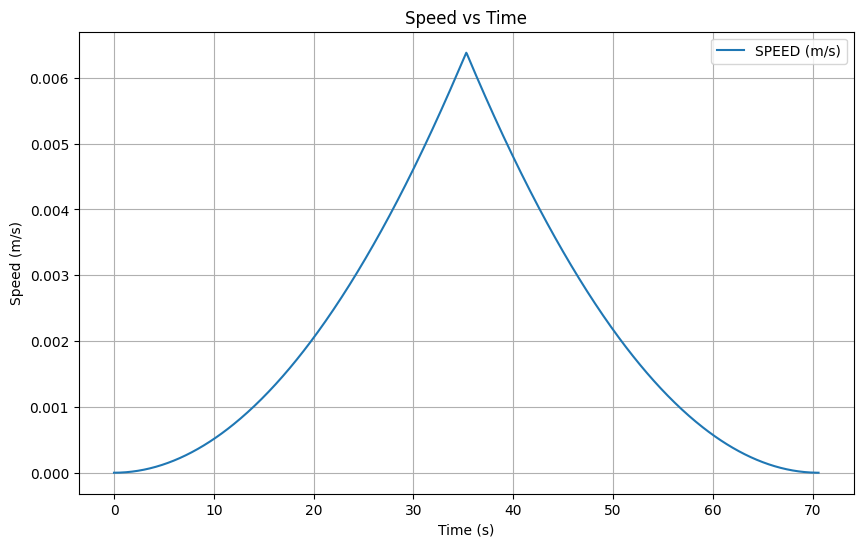

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['time'], test_data['SPEED_m_s'], label='SPEED (m/s)')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('Speed vs Time')
plt.legend()
plt.grid(True)
plt.show()

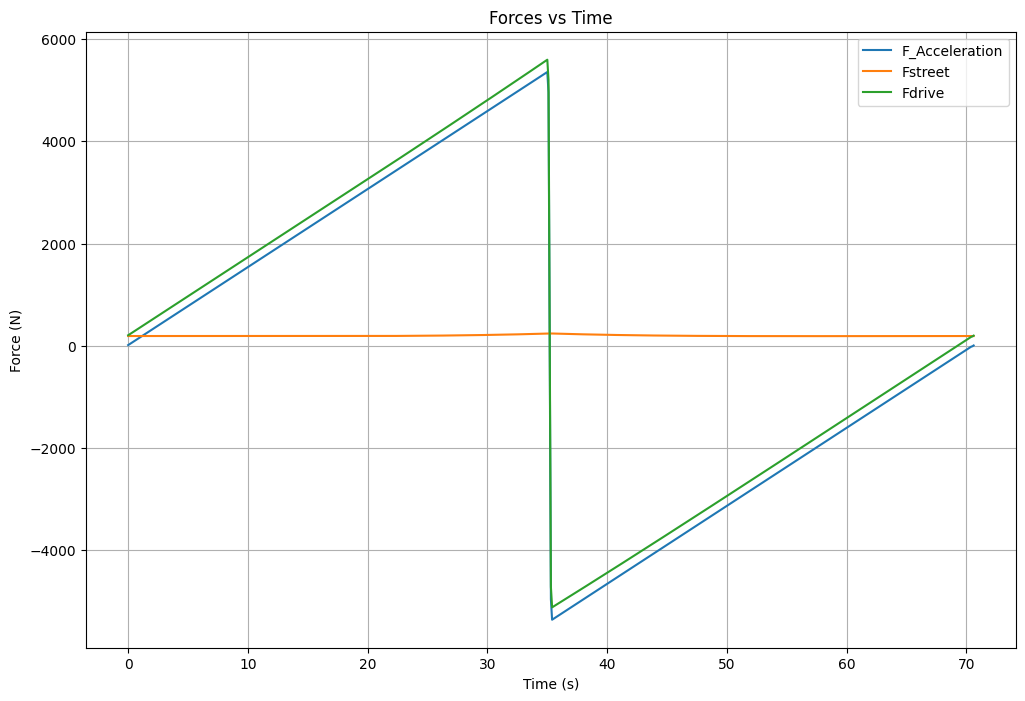

In [56]:
plt.figure(figsize=(12, 8))
plt.plot(test_data['time'], test_data['F_Acceleration'], label='F_Acceleration')
plt.plot(test_data['time'], test_data['Fstreet'], label='Fstreet')
plt.plot(test_data['time'], test_data['Fdrive'], label='Fdrive')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.title('Forces vs Time')
plt.legend()
plt.grid(True)
plt.show()

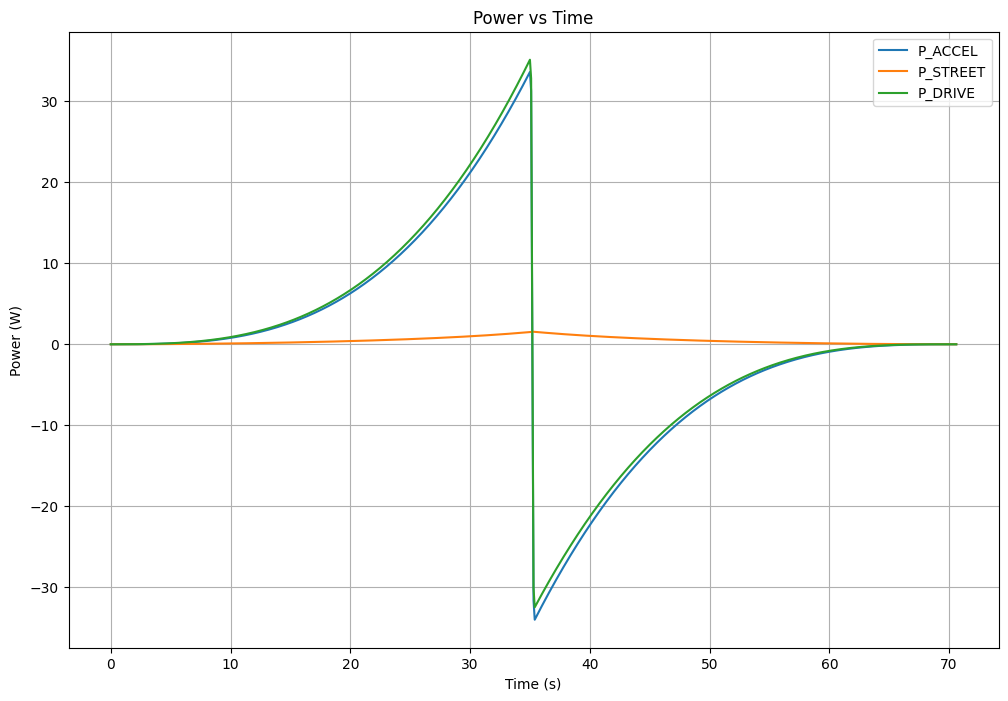

In [57]:
plt.figure(figsize=(12, 8))
plt.plot(test_data['time'], test_data['P_ACCEL'], label='P_ACCEL')
plt.plot(test_data['time'], test_data['P_STREET'], label='P_STREET')
plt.plot(test_data['time'], test_data['P_DRIVE'], label='P_DRIVE')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.title('Power vs Time')
plt.legend()
plt.grid(True)
plt.show()

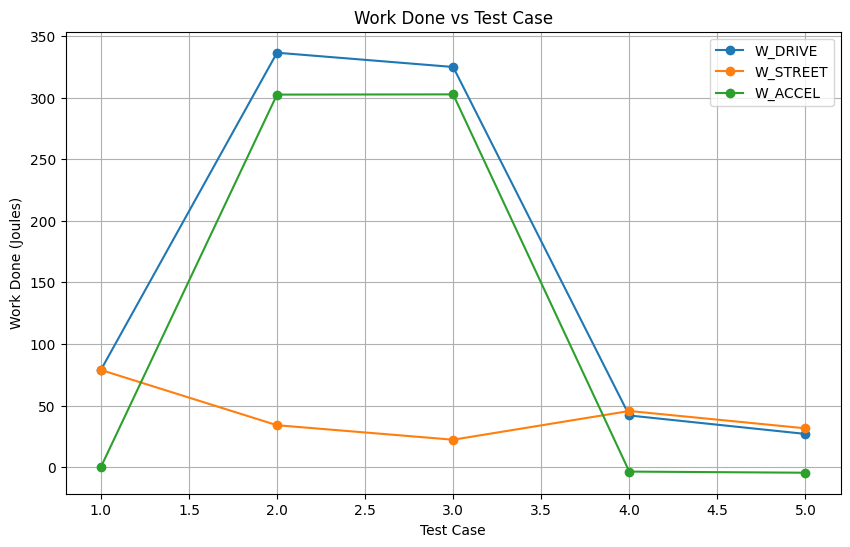

In [67]:
# Define the work done values for each test case
W_DRIVE = [78.88, 336.48, 324.90, 41.92, 26.94]
W_STREET = [78.88, 34.01, 22.24, 45.56, 31.50]
W_ACCEL = [0.00, 302.47, 302.66, -3.64, -4.56]

# Plot the work done against time
plt.figure(figsize=(10, 6))
plt.plot(time_data[:len(W_DRIVE)], W_DRIVE, label='W_DRIVE', marker='o')
plt.plot(time_data[:len(W_STREET)], W_STREET, label='W_STREET', marker='o')
plt.plot(time_data[:len(W_ACCEL)], W_ACCEL, label='W_ACCEL', marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Work Done (Joules)')
plt.title('Work Done vs Time')
plt.legend()
plt.grid(True)
plt.show()


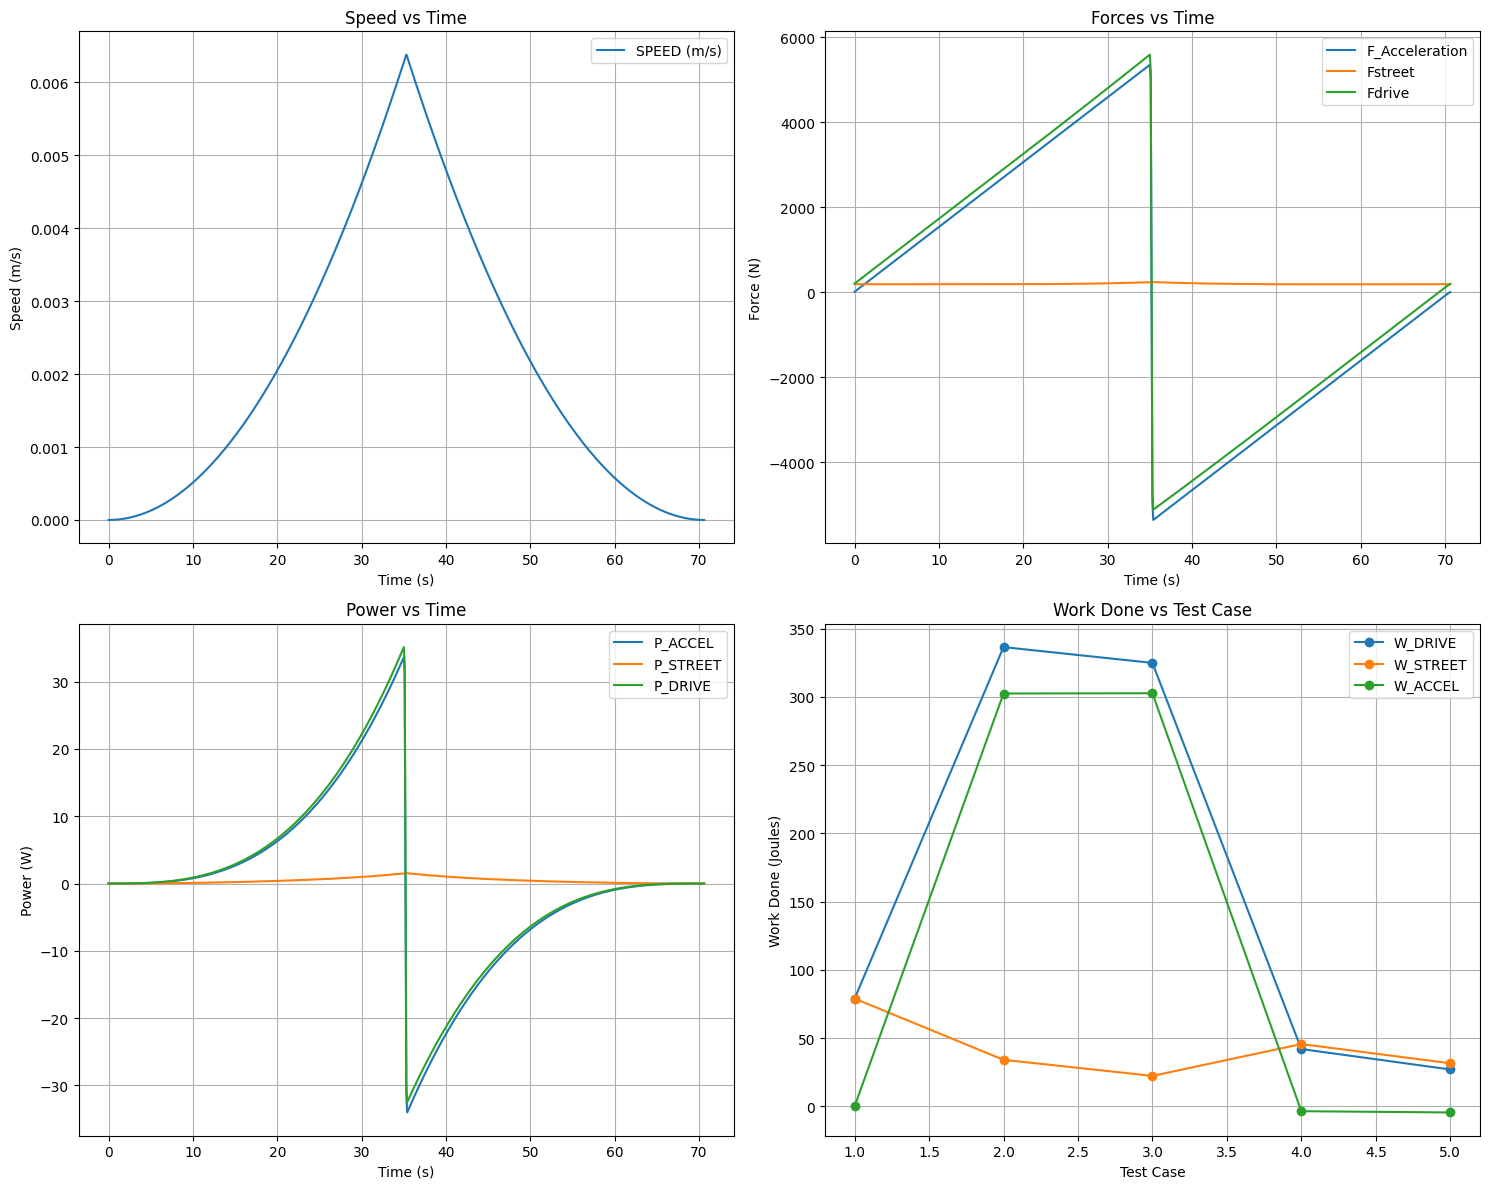

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Speed vs Time
axs[0, 0].plot(test_data['time'], test_data['SPEED_m_s'], label='SPEED (m/s)')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Speed (m/s)')
axs[0, 0].set_title('Speed vs Time')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Forces vs Time
axs[0, 1].plot(test_data['time'], test_data['F_Acceleration'], label='F_Acceleration')
axs[0, 1].plot(test_data['time'], test_data['Fstreet'], label='Fstreet')
axs[0, 1].plot(test_data['time'], test_data['Fdrive'], label='Fdrive')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Force (N)')
axs[0, 1].set_title('Forces vs Time')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Power vs Time
axs[1, 0].plot(test_data['time'], test_data['P_ACCEL'], label='P_ACCEL')
axs[1, 0].plot(test_data['time'], test_data['P_STREET'], label='P_STREET')
axs[1, 0].plot(test_data['time'], test_data['P_DRIVE'], label='P_DRIVE')
axs[1, 0].set_xlabel('Time (s)')
axs[1, 0].set_ylabel('Power (W)')
axs[1, 0].set_title('Power vs Time')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Work done vs Test case
test_cases = np.arange(1, len(work_done) + 1)
axs[1, 1].plot(test_cases, work_done_drive, label='W_DRIVE', marker='o')
axs[1, 1].plot(test_cases, work_done, label='W_STREET', marker='o')
axs[1, 1].plot(test_cases, work_done_accel, label='W_ACCEL', marker='o')
axs[1, 1].set_xlabel('Test Case')
axs[1, 1].set_ylabel('Work Done (Joules)')
axs[1, 1].set_title('Work Done vs Test Case')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()